# Data Science 301 Final Project
Anyesha Ray and Eric Gleiter

### Loading Data 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("vehicles.csv")
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [3]:
data.shape

(423857, 25)

In [4]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

# Looking into variable we are interested in 

Year

In [15]:
print (data['year'].value_counts().iloc[:10])

2017.0    30828
2015.0    21901
2014.0    21773
2013.0    21480
2016.0    21430
2012.0    19130
2011.0    18412
2018.0    17839
2019.0    16995
2008.0    16070
Name: year, dtype: int64


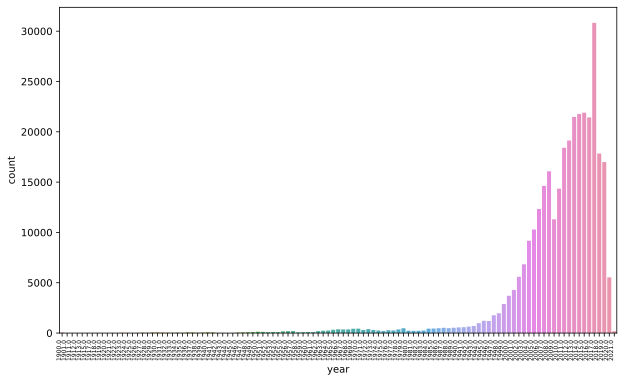

In [17]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='year',data=data);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=6);

In [ ]:
Manufacturer

Price

In [5]:
data['price'].describe()

count    4.238570e+05
mean     5.779437e+04
std      1.002581e+07
min      0.000000e+00
25%      4.499000e+03
50%      9.995000e+03
75%      1.899500e+04
max      3.808256e+09
Name: price, dtype: float64

Text(0, 0.5, 'Count')

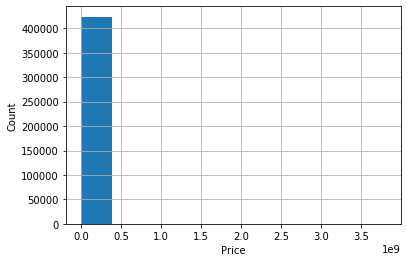

In [6]:
data['price'].hist()
plt.xlabel('Price')
plt.ylabel('Count')

In [7]:
data['price'].value_counts().head()

0       35025
3500     3865
8995     3589
7995     3537
4500     3465
Name: price, dtype: int64

Looks like there are a lot of prices at 0. This most likely means they were posted at "best offer". Since looking through description would make it too complicated, I just dropped them. There are only 35,000 values at 0, which sounds like a lot, but isn't that many out of 423,857. Also we would not be able to predict those entries anyways. 

In [ ]:
data= data[data['price'] > 0]

In [ ]:
data.shape

# Missing values and unnecessary variables

Won't need variables like 'url', 'region_url', 'image_url', 'description', 'county', 'state', 'lat', 'long' so I got rid of them right away. 

In [ ]:
data=data.drop(columns=['url','region','id', 'region_url', 'image_url', 'description', 'county', 'state', 'lat', 'long'])
data.head()

Seems like we have a lot of 0 dollar cars being sold. Should look into this later on. 

In [ ]:
data.isna().any()

Have lot's of missing values. Let's try getting rid of them. 

In [ ]:
data_clean=data.dropna()

In [ ]:
data_clean.shape

In [ ]:
data=data_clean

Since we still have a lot of data to work with, I am just dropping the missing variables instead of imputing them. 

# Look into attributes

In [ ]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
data.info()

Year has strongest correlation, doesn't look like others do. We have mostly categorical variables.

In [ ]:
data_encoded = pd.get_dummies(data)
data_encoded.head()